In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble

In [ ]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

# **Measuring a single cubit with the help of classical bit**

First define a quantumregister for storing one qubit, then a classical register. Then, after that we define a quantum circuit with qubit at first and then a classical bit.Then, we apply the measurement.

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.measure(qr, cr)

Now, let's simulate this circuit on a simulator Aer

In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.8 MB/s eta 0:00:00


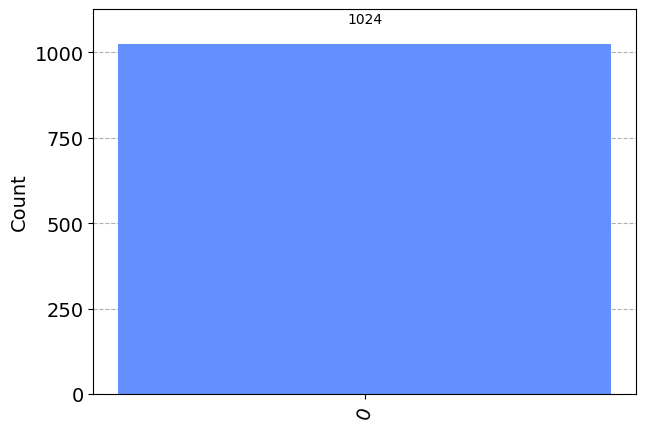

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024). result()
plot_histogram(result.get_counts())

In [ ]:
print(result.get_counts())

{'0': 1024}


 Why the outcome of all 1024 is zero ?::

---

This is due to the reason that when a quantu system or qubit is prepared, it is prepared in zero state. And, we have not applied any quantum gate on it. That's why it will be measured zero always.


## After applying Hadmard Gate H.

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr)
circuit.measure(qr, cr)

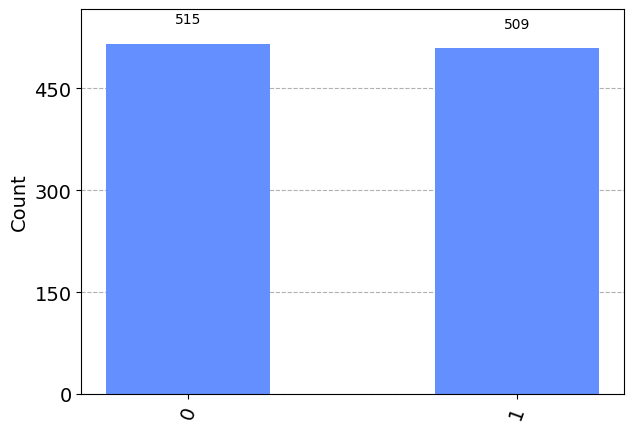

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
plot_histogram(result.get_counts())

In [ ]:
print(result.get_counts())

{'1': 509, '0': 515}


This shows that after applying hamdard gate to qubit, it get's into a superposed state of 0 and 1. So, now there are 50 percent chances of 1 and 50 percent chances of measuring 0. As, we can see in the uper graph we can have almost equal number of counts of 0 and 1

### **State Vectors**

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
#circuit.h(qr)
# circuit.measure(qr, cr)

For the case of state vector we change simulator to a state vector simulator. And import an element array_to_latex for vector representation and and plot_bloch_multivector

In [ ]:
from qiskit.tools.visualization import array_to_latex, plot_bloch_multivector
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)


<IPython.core.display.Latex object>

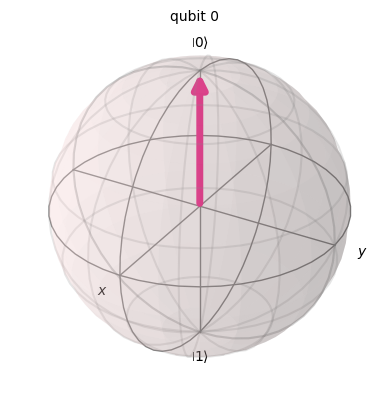

In [ ]:
plot_bloch_multivector(statevector)

That means our first quantum state or qubit is prepared in zero state.

# Now let's apply Hamdard gate, it will convert it into a superposed state.

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.h(0)
# circuit.measure(qr, cr)

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

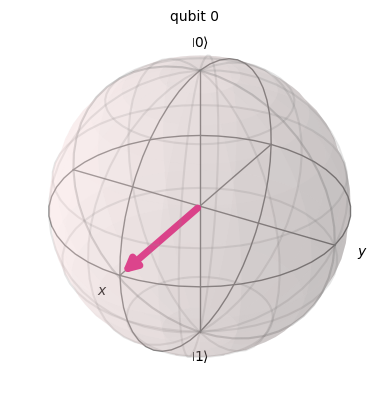

In [ ]:
plot_bloch_multivector(statevector)

# Now let's apply measurement it would collapse to either 1 or 0

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.h(0)
circuit.measure(qr, cr)

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

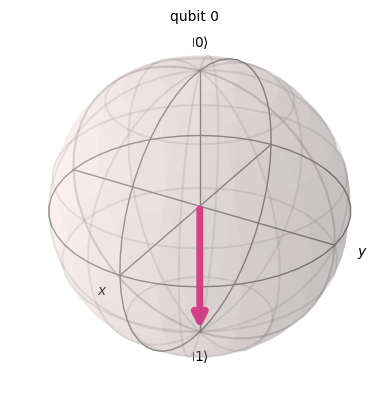

In [ ]:
plot_bloch_multivector(statevector)

## **Multiple QubitS meausrement**

Now, using n=2, we would have two qubits with 4 basis.

In [ ]:
circuit = QuantumCircuit(2)

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

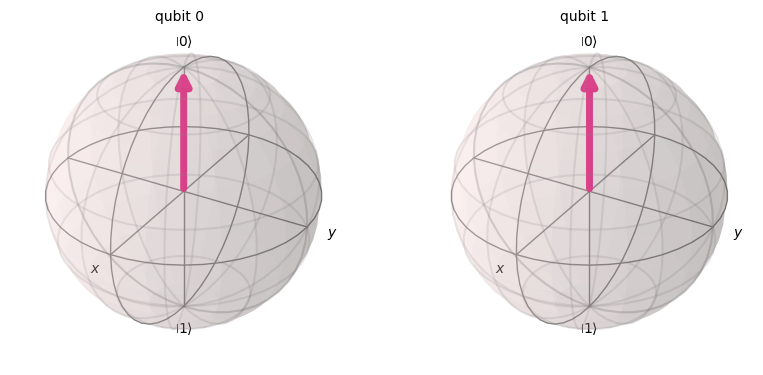

In [ ]:
plot_bloch_multivector(statevector)

That means both qubits are prepared in state 0.


---


**Now applying Hamdard gate to first qubit.**

In [ ]:
circuit = QuantumCircuit(2)
circuit.h(0)

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

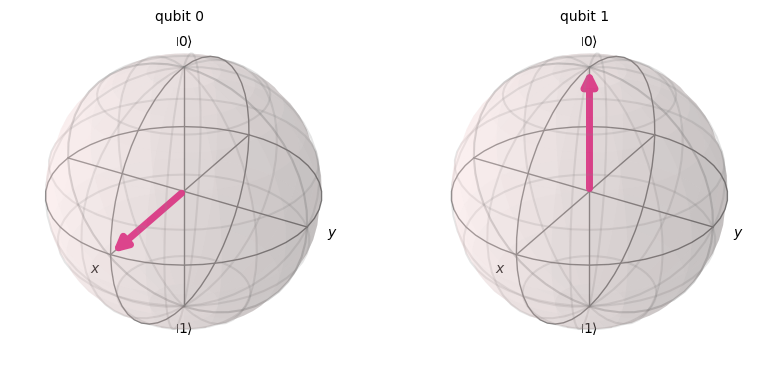

In [ ]:
plot_bloch_multivector(statevector)



---

**Applying measurement**


Now applying measurement circuit would collapse the measurement of qubit being applied by hamdard gate to either 00 or 11


In [ ]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.measure_all()

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector)

<IPython.core.display.Latex object>

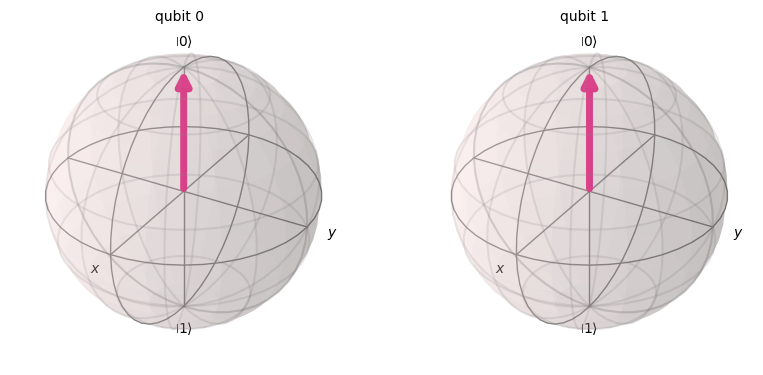

In [ ]:
plot_bloch_multivector(statevector)

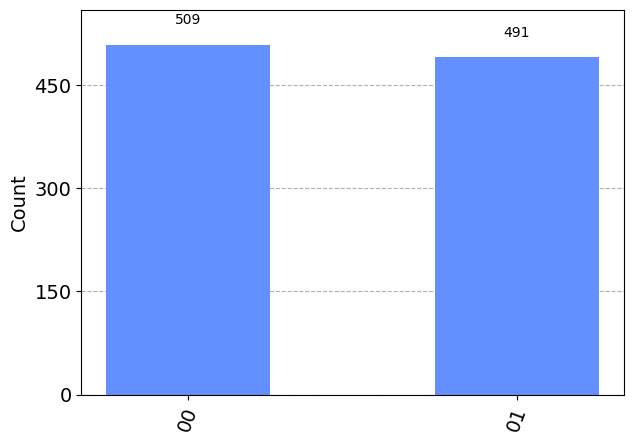

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1000).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
print(counts)

{'01': 491, '00': 509}
